In [1]:
%matplotlib inline
%config IPCompleter.greedy=True

import copy
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import scipy.stats as st
import auxiliary_functions as aux
import dfa_functions as dfaf
from scipy.optimize import curve_fit


pd.options.display.max_rows = 10

# Run the script to load the data (the series and their segmentation) and to delete all segments with indeterminate stage or whose max frequency is below 85%
from load_data import load_data, redo_classification
data, seg_res = load_data(filter = 0)
# Reclassificates the segments using the 4 stage system.
seg_res = redo_classification(seg_res, data)
from load_increments import load
increments = load(data, seg_res, 4)


# Aglutinates the segments statistics of all the subjects, distinguishing them only by their groups.
from aglutinates_statistics import aglutinates
means, medians, variances, lengths, t_i, t_f, delta_t = aglutinates(data, seg_res, 4)



In [2]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [3]:
plt.style.use('ggplot')

In [ ]:
# reset rcParams
plt.rcParams.update(IPython_default);

***

# Correlation

## 1. Scatter Plot

Scatteplot is a classic and fundamental plot used to study the relationship between two variables. If you have multiple groups in your data you may want to visualise each group in a different color. In matplotlib, you can conveniently do this using plt.scatterplot().

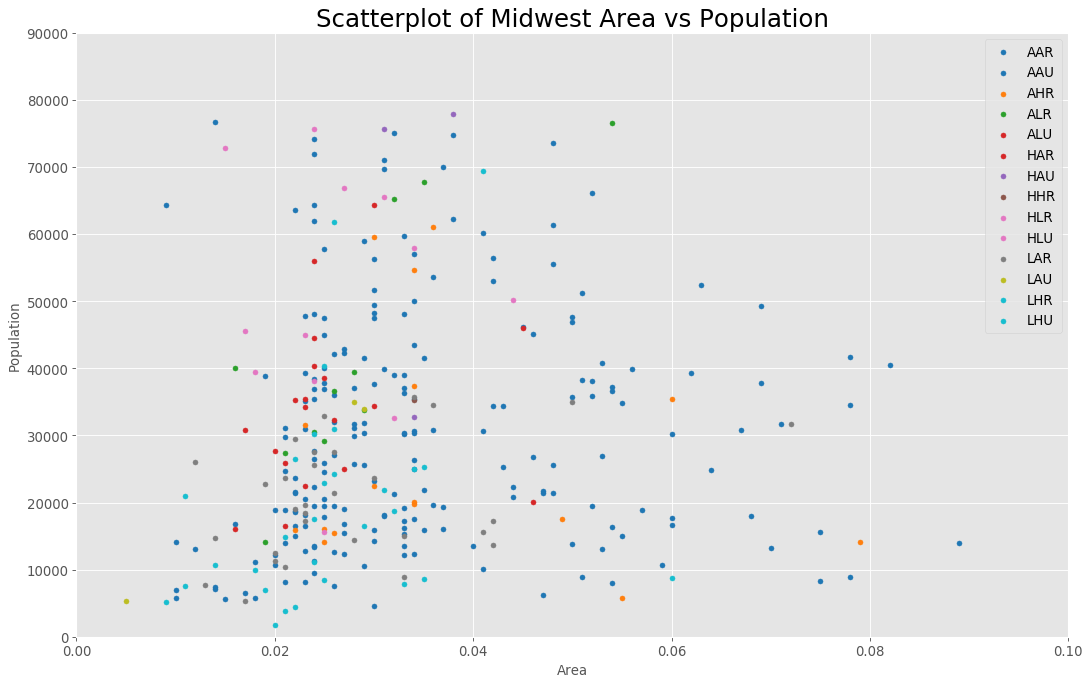

In [27]:
# Import dataset
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Prepare Data
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories) - 1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize = (16, 10), dpi = 80, facecolor = 'w', edgecolor = 'k') # Cria uma nova figura

for i, category in enumerate(categories): # Fazer uma enumeração de uma lsita.
    plt.scatter('area', 'poptotal',
                data = midwest.loc[midwest.category == category, :],
                s = 20, c = [colors[i]], label = str(category))
    
# Decorations
plt.gca().set(xlim = (0.0, 0.1), ylim = (0, 90000),
              xlabel = 'Area', ylabel = 'Population')
    #gca: get current axes - É uma função que me devolve uma classe.
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize = 22)
plt.legend(fontsize = 12)
plt.show()

## 2. Bubble plot with Encircling

Sometimes you want to show a group of points within a boundary to emphasize their importance. In this example, you get the records from the dataframe that should be encircled and pass it to the encircle() described in the code below.

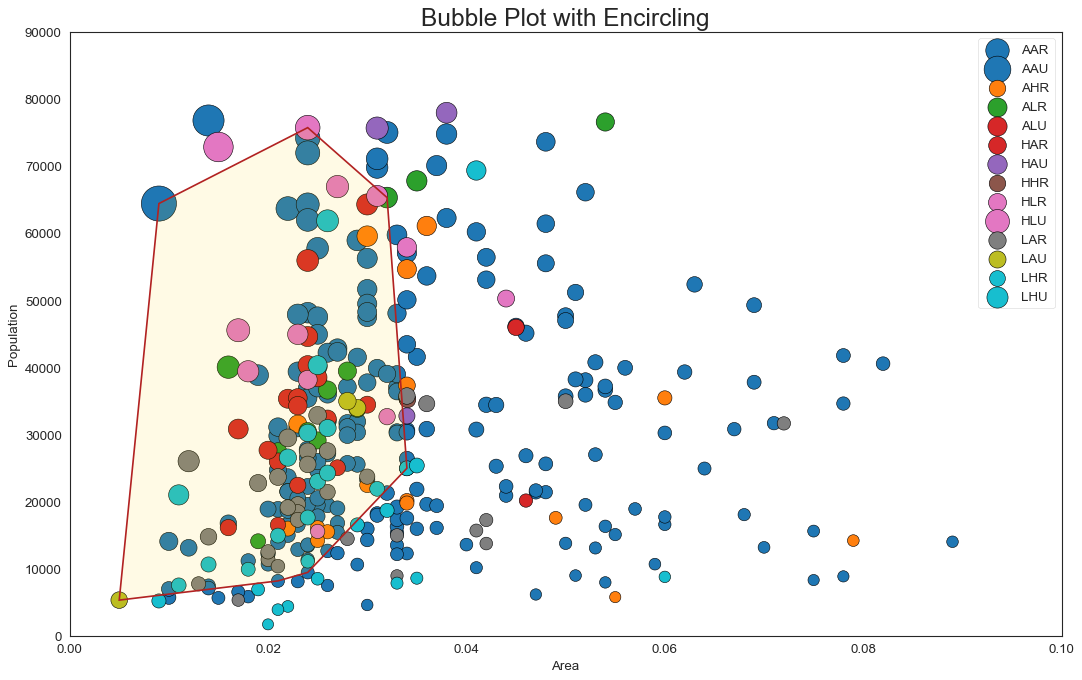

In [38]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories) - 1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize = (16, 10), dpi = 80, facecolor = 'w', edgecolor = 'k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data = midwest.loc[midwest.category == category, :],
               s = 'dot_size', c = [colors[i]], label = str(category), edgecolors = 'black',
               linewidths = .5)
    
# Step 3: Encircling
def encircle(x, y, ax = None, **kw):              # **kw: outros argumentos
    if not ax: ax = plt.gca()
    p = np.c_[x, y]                               # concatena no eixo 2
    hull = ConvexHull(p)                          # retorna o objeto da figura geométrica
    poly = plt.Polygon(p[hull.vertices, :], **kw) # retorna o poligono.
    ax.add_patch(poly)                            # plota o poligono
    
# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state == 'IN', :]

# Draw polygon surrounding vertices
encircle(midwest_encircle_data.area, 
         midwest_encircle_data.poptotal,
         ec = "k", fc = "gold", alpha = 0.1)
encircle(midwest_encircle_data.area,
         midwest_encircle_data.poptotal,
         ec = "firebrick", fc = "none", linewidth = 1.5)

# Step 4: Decorations
plt.gca().set(xlim = (0.0, 0.1), ylim = (0, 90000),
              xlabel = 'Area', ylabel = 'Population')

plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.title("Bubble Plot with Encircling", fontsize = 22)
plt.legend(fontsize = 12)
plt.show()

## 3. Scatter plot with linear regression line of best fit

If you want to understand how two variables change with respect to each other, the line of best fit is the way to go. The below plot shows how the line of best fit differs amongst various groups in the data. To disable the groupings and to just draw one line-of-best-fit for the entire dataset, remove the hue='cyl' parameter from the sns.lmplot() call below.

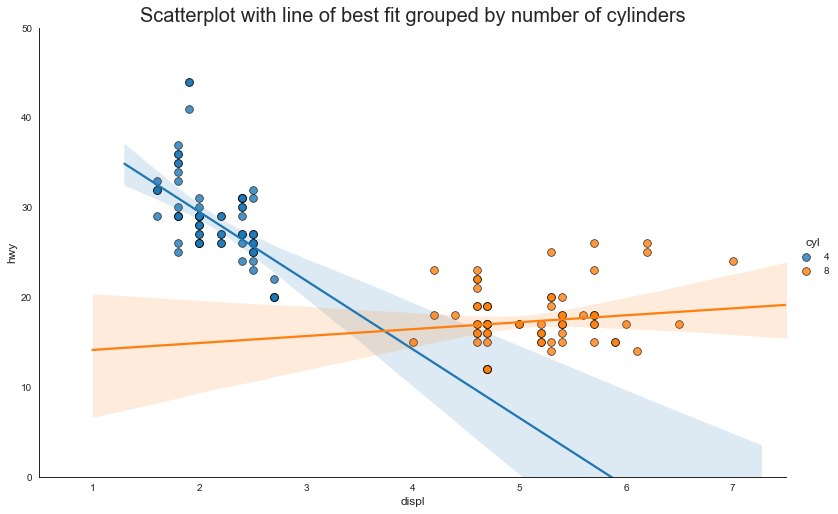

In [43]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4, 8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x = "displ", y = "hwy", hue = "cyl",
                     data = df_select, height = 7, aspect = 1.6, robust = True,
                     palette = 'tab10', scatter_kws = dict(s = 60, linewidths = .7, edgecolors = 'black'))

# Decorations
gridobj.set(xlim = (0.5, 7.5), ylim = (0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders",
          fontsize = 20)
plt.show()

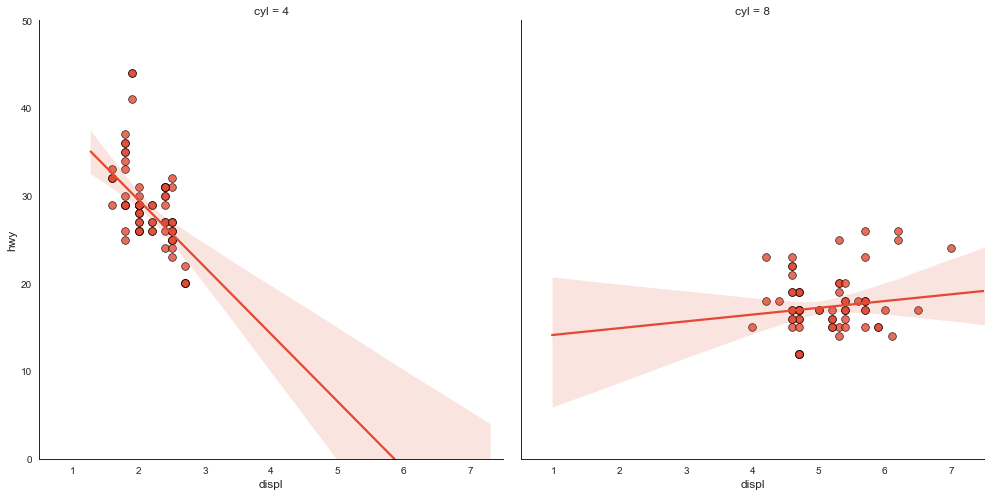

In [46]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Each line in its own column
sns.set_style("white")
gridobj = sns.lmplot(x = "displ", y = "hwy",
                     data = df_select,
                     height = 7,
                     robust = True,
                     palette = 'Setl',
                     col = "cyl",
                     scatter_kws = dict(s = 60, linewidths = .7,
                                        edgecolors = 'black'))

# Decorations
gridobj.set(xlim = (0.5, 7.5), ylim = (0, 50))
plt.show()

## 4 - Jittering with stripplot

Often multiple datapoints have exactly the same X and Y values. As a result, multiple points get plotted over each other and hide. To avoid this, jitter the points slightly so you can visually see them. This is convenient to do using seaborn’s stripplot().

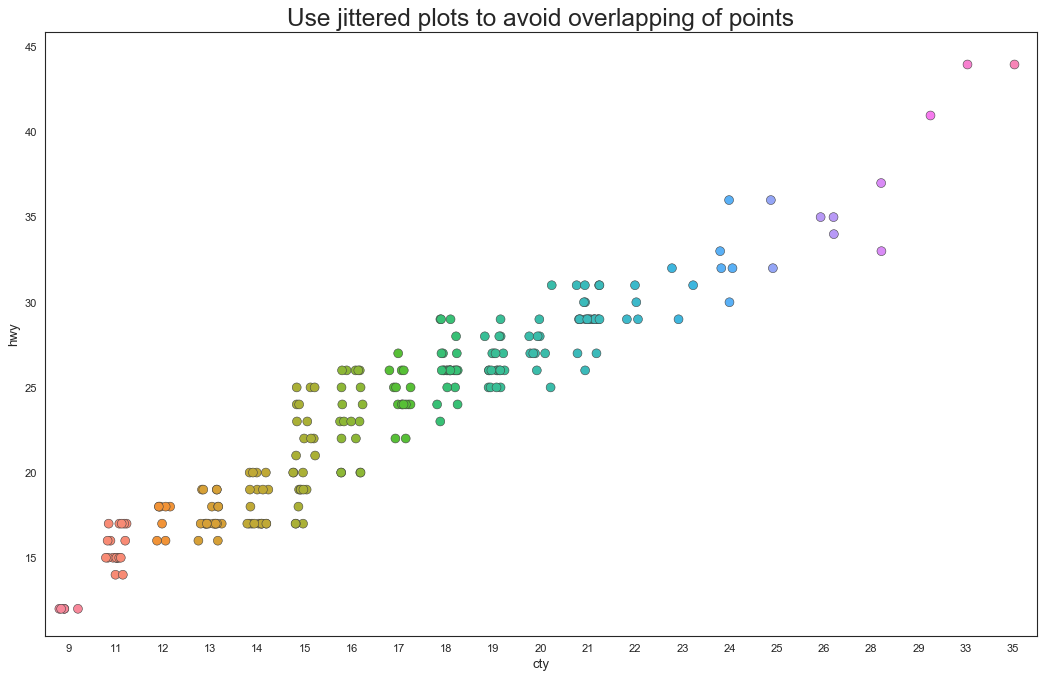

In [47]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Draw Stripplot
fig, ax = plt.subplots(figsize = (16, 10), dpi = 80)
sns.stripplot(df.cty, df.hwy, jitter = 0.25, size = 8, ax = ax, linewidth = .5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize = 22)
plt.show()

## 5. Counts Plot

Another option to avoid the problem of points overlap is the increase the size of the dot depending on how many points lie in that spot. So, larger the size of the point more is the concentration of points around that.

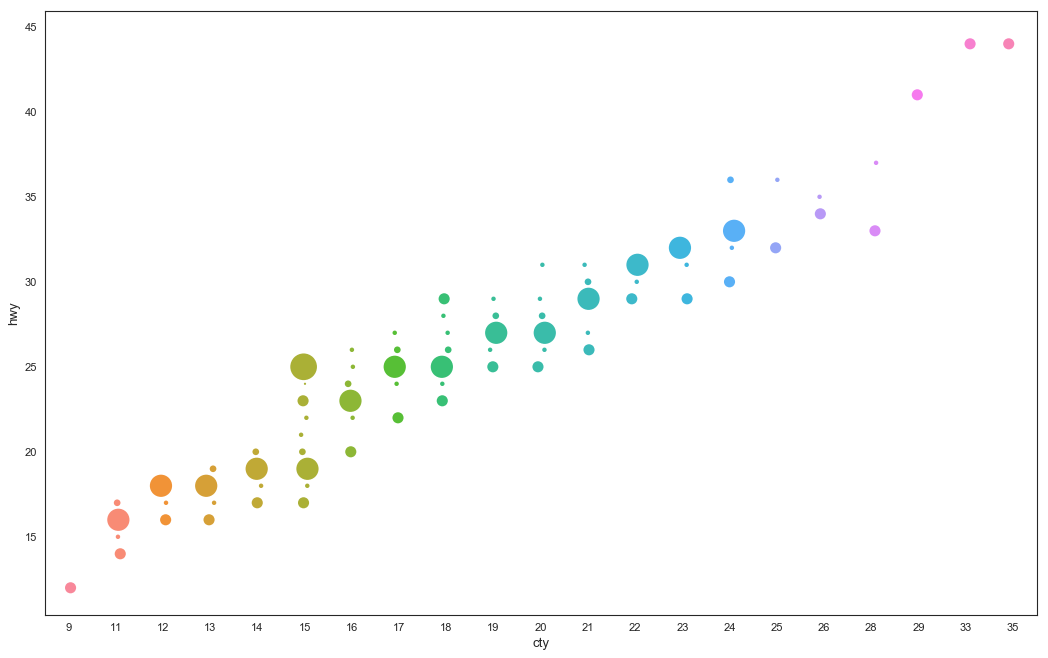

In [48]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize = (16, 10), dpi = 80)
sns.stripplot(df_counts.cty, df_counts.hwy, size = df_counts.counts*2, ax = ax)

## 6. Marginal Histogram

Marginal histograms have a histogram along the X and Y axis variables. This is used to visualize the relationship between the X and Y along with the univariate distribution of the X and the Y individually. This plot if often used in exploratory data analysis (EDA).

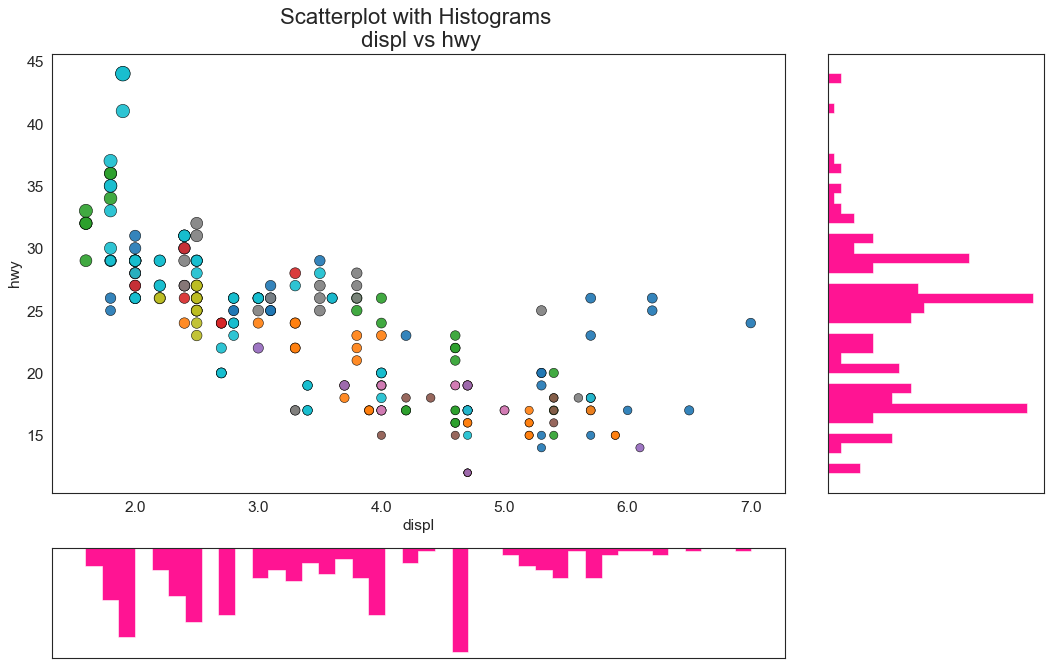

In [93]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels = [], yticklabels = [])
ax_bottom = fig.add_subplot(grid[-1, :-1], xticklabels = [], yticklabels = [])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s = df.cty*5, c = df.manufacturer.astype('category').cat.codes,
                                alpha = .9, data = df, cmap = "tab10",
                                edgecolors = 'k', linewidths = 0.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype = 'stepfilled', orientation = 'vertical',
                             color = 'deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype = 'stepfilled', orientation = 'horizontal',
                          color = 'deeppink')

# Decorations
ax_main.set(title = 'Scatterplot with Histograms \n displ vs hwy',
            xlabel = 'displ', ylabel = 'hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

## 7. Marginal Boxplot

Marginal boxplot serves a similar purpose as marginal histogram. However, the boxplot helps to pinpoint the median, 25th and 75th percentiles of the X and the Y.


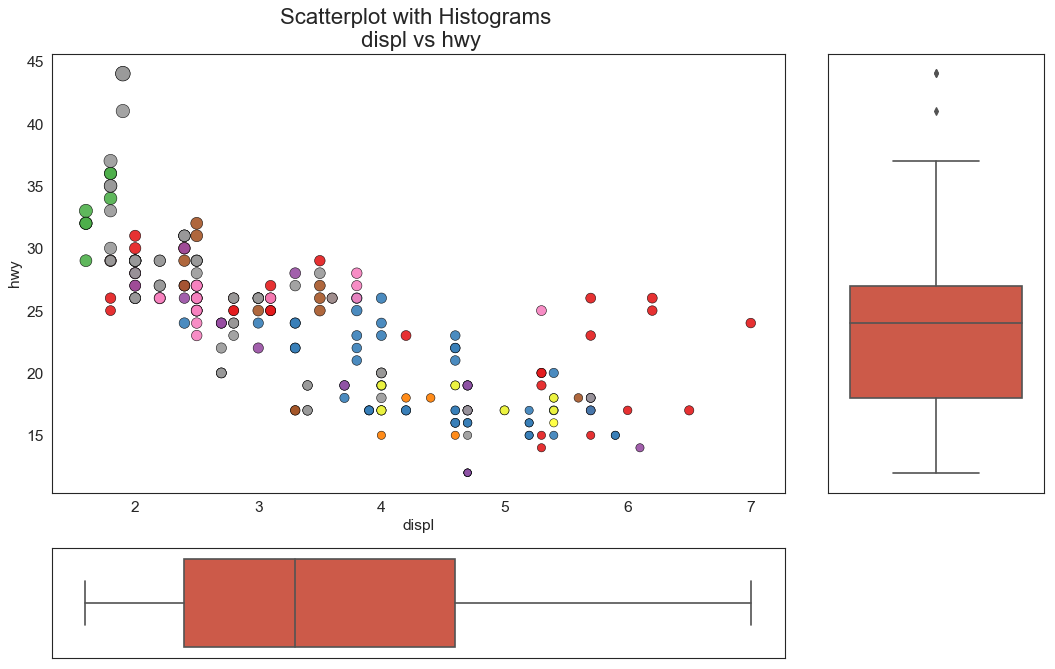

In [94]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

## 8. Correllogram

Correlogram is used to visually see the correlation metric between all possible pairs of numeric variables in a given dataframe (or 2D array).

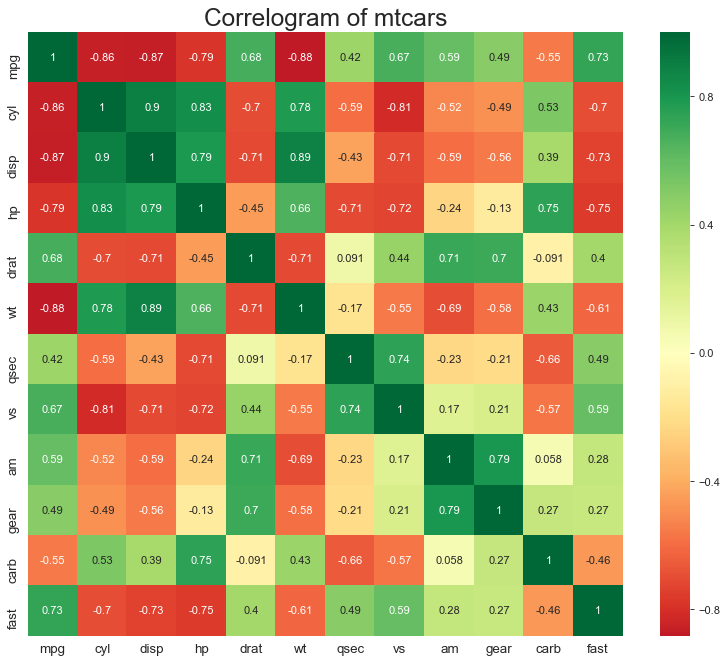

In [100]:
# Import Dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

# Plot
plt.figure(figsize = (12, 10), dpi = 80)
sns.heatmap(df.corr(),
            xticklabels = df.corr().columns,
            yticklabels = df.corr().columns,
            cmap = 'RdYlGn',
            center = 0,
            annot = True)

# Decorations
plt.title('Correlogram of mtcars', fontsize = 22)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()


## 9. Pairwise Plot

Pairwise plot is a favorite in exploratory analysis to understand the relationship between all possible pairs of numeric variables. It is a must have tool for bivariate analysis.

<Figure size 800x640 with 0 Axes>

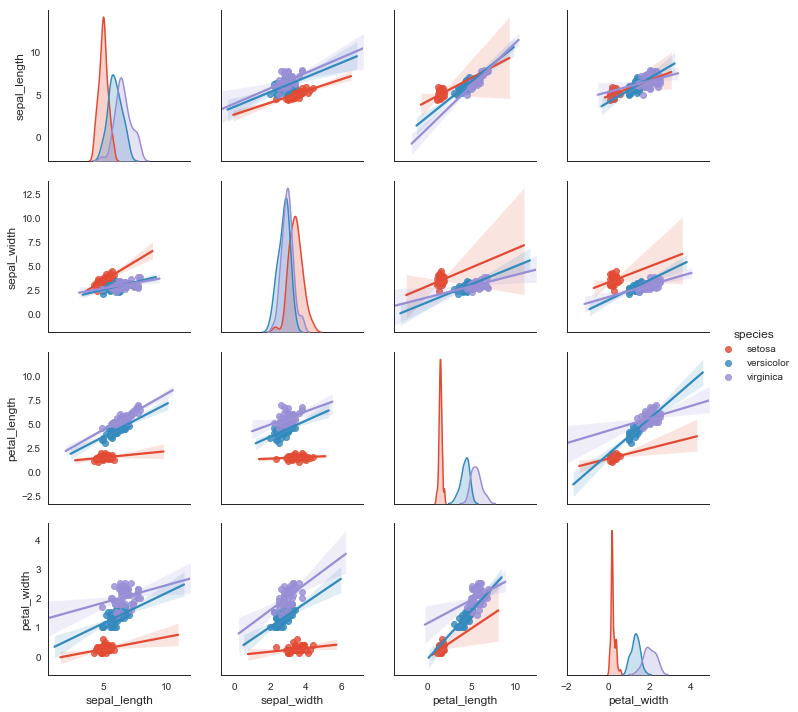

In [104]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize = (10, 8), dpi = 80)
sns.pairplot(df, kind = "reg", hue = "species")
plt.show()

<Figure size 800x640 with 0 Axes>

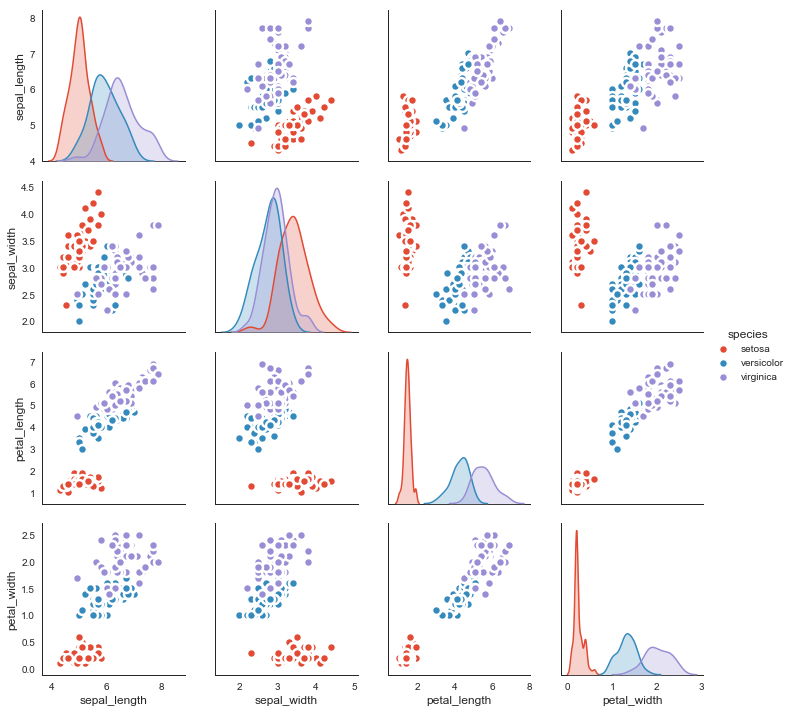

In [105]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

***

# Change

## 35. Time Series Plot

Time series plot is used to visualise how a given metric changes over time. Here you can see how the Air Passenger traffic changed between 1949 and 1969.